### Import Required Library Packages

In [1]:
# for data reading and lieaar algebra calculation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# for Data preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# for model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# for feature selection
from sklearn.feature_selection import SelectKBest
# for building pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# for training model
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
# for evaluation of models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

/home/bienvenue/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/bienvenue/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


### Import Dataset

In [2]:
# import dataset into pandas dataframe
df = pd.read_csv('employee_churn_data.csv')

### Description of columns
<p><b>department</b> - the department the employee belongs to.<br>
<b>promoted</b> - 1 if the employee was promoted in the previous 24 months, 0 otherwise.<br>
<b>review</b> - the composite score the employee received in their last evaluation.<br>
<b>projects</b> - how many projects the employee is involved in.<br>
<b>salary</b> - for confidentiality reasons, salary comes in three tiers: low, medium, high.<br>
<b>tenure</b> - how many years the employee has been at the company.<br>
<b>satisfaction</b> - a measure of employee satisfaction from surveys.<br>
<b>bonus</b> - 1 if the employee received a bonus in the previous 24 months, 0 otherwise.<br>
<b>avg_hrs_month</b> - the average hours the employee worked in a month.<br>
<b>left</b> - "yes" if the employee ended up leaving, "no" otherwise.</p>

### Getting basic overview of dataset

In [3]:
# how does data look like
df.sample(5)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
5053,marketing,0,0.707987,3,high,7.0,0.427928,0,185.783224,no
2312,sales,0,0.751202,3,high,6.0,0.390871,1,184.107558,no
9180,operations,0,0.679165,3,medium,7.0,0.859877,1,187.063228,yes
7531,marketing,0,0.842047,3,medium,8.0,0.516409,0,188.203336,no
4660,sales,0,0.655942,3,medium,5.0,0.589641,0,179.759268,yes


In [4]:
# checking how big is data
df.shape

(9540, 10)

In [5]:
# checking basic info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [6]:
# how data look like mathematically
df.describe()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,6.556184,0.504645,0.212055,184.661571
std,0.171403,0.085307,0.579136,1.415432,0.158555,0.408785,4.144831
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.374060
25%,0.000000,0.592884,3.000000,5.000000,0.386801,0.000000,181.472085
50%,0.000000,0.647456,3.000000,7.000000,0.500786,0.000000,184.628796
75%,0.000000,0.708379,4.000000,8.000000,0.622607,0.000000,187.728708
max,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,200.861656


In [7]:
# checking there is any missing values
df.isnull().sum()

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64

In [8]:
# checking any duplicates row in data
df.duplicated().sum()

0

In [9]:
df.tail()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes
9539,finance,0,0.626373,3,low,7.0,0.706455,1,185.920934,yes


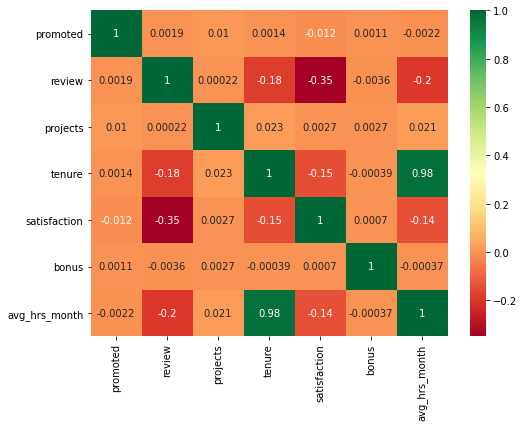

In [10]:
# Check the data types
#print(df.dtypes)
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
# Visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [11]:
print(df.dtypes)

department        object
promoted           int64
review           float64
projects           int64
salary            object
tenure           float64
satisfaction     float64
bonus              int64
avg_hrs_month    float64
left              object
dtype: object


In [12]:
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [13]:
# what are diffrent categorical values in department col.
df['department'].unique()

array(['operations', 'support', 'logistics', 'sales', 'IT', 'admin',
       'engineering', 'marketing', 'finance', 'retail'], dtype=object)

In [14]:
# what are diffrent categorical values in salary col.
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [15]:
# what are diffrent categorical values in promoted col.
df['promoted'].unique()

array([0, 1])

In [16]:
# what are diffrent categorical values in bonus col.
df['bonus'].unique()

array([0, 1])

### Exploratory Data Analysis

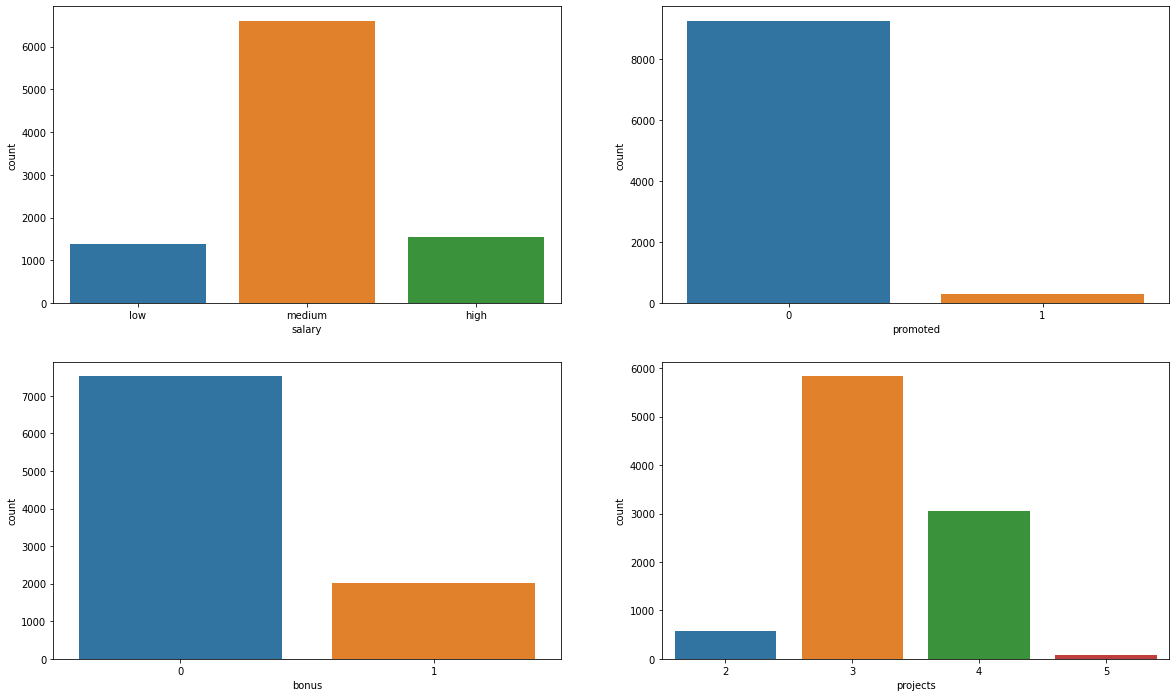

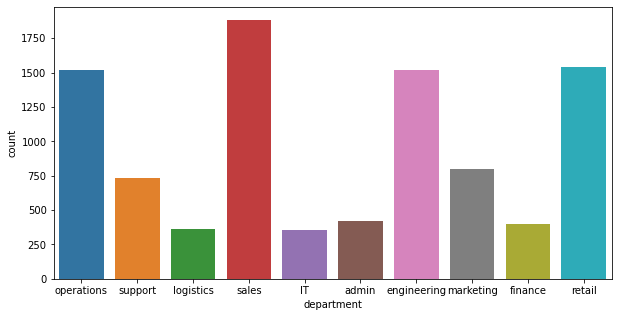

In [17]:
# visualizing how many employees in each category are there
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.countplot(x=df['salary'])
plt.subplot(2,2,2)
sns.countplot(x=df['promoted'])
plt.subplot(2,2,3)
sns.countplot(x=df['bonus'])
plt.subplot(2,2,4)
sns.countplot(x=df['projects'])
plt.figure(figsize=(10,5))
sns.countplot(x=df['department'])
plt.show()

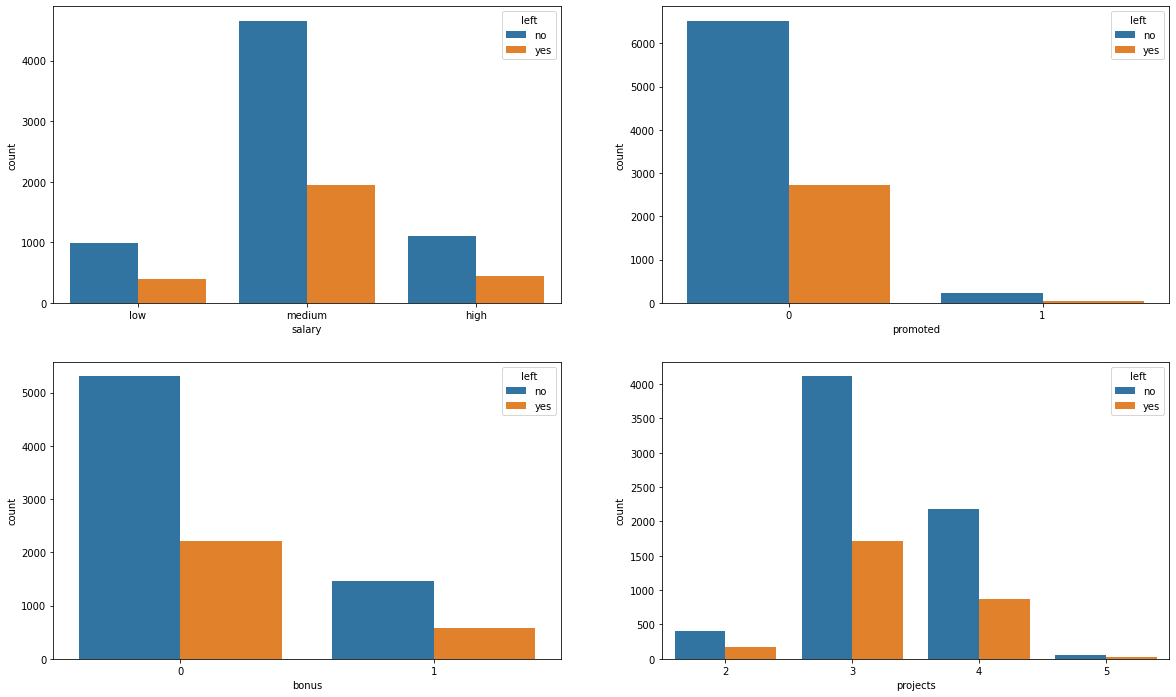

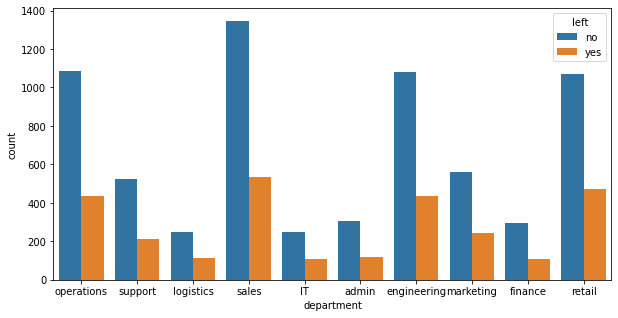

In [18]:
# visualizing how many employees in each category leave and stay
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.countplot(x=df['salary'], hue=df['left'])
plt.subplot(2,2,2)
sns.countplot(x=df['promoted'], hue=df['left'])
plt.subplot(2,2,3)
sns.countplot(x=df['bonus'], hue=df['left'])
plt.subplot(2,2,4)
sns.countplot(x=df['projects'], hue=df['left'])
plt.figure(figsize=(10,5))
sns.countplot(x=df['department'], hue=df['left'])
plt.show()

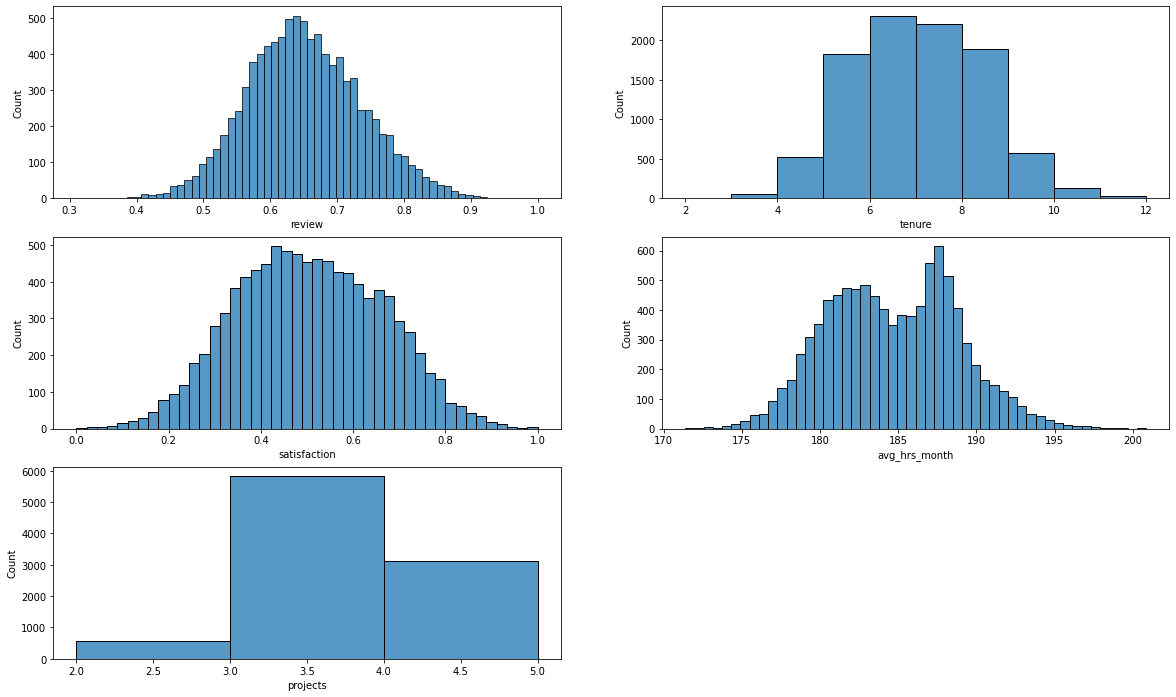

In [19]:
# visualizing numerical columns
plt.figure(figsize=(20,12))
plt.subplot(3,2,1)
sns.histplot(x=df['review'])
plt.subplot(3,2,2)
sns.histplot(x=df['tenure'],bins=12,binwidth=1)
plt.subplot(3,2,3)
sns.histplot(x=df['satisfaction'])
plt.subplot(3,2,4)
sns.histplot(x=df['avg_hrs_month'])
plt.subplot(3,2,5)
sns.histplot(x=df['projects'],binwidth=1)
plt.show()

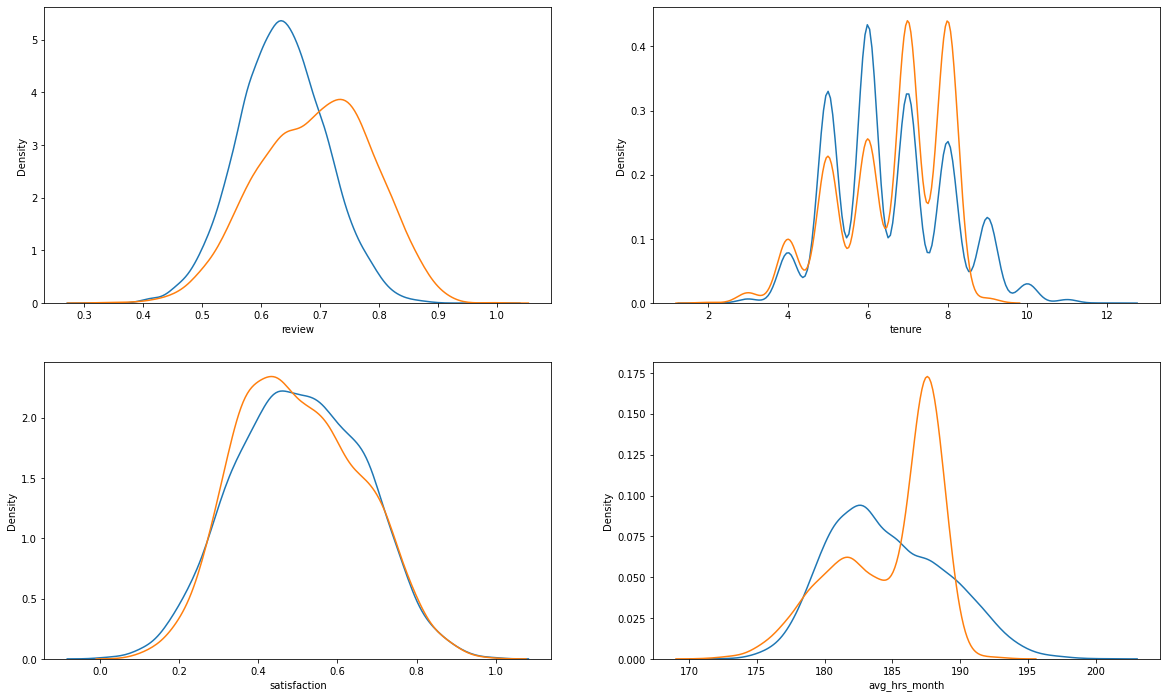

In [20]:
# visualizing numerical col of leave and stay employees of there density
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.kdeplot(df[df['left'] == 'no']['review'])
sns.kdeplot(df[df['left'] == 'yes']['review'])
plt.subplot(2,2,2)
sns.kdeplot(x=df[df['left'] == 'no']['tenure'])
sns.kdeplot(x=df[df['left'] == 'yes']['tenure'])
plt.subplot(2,2,3)
sns.kdeplot(x=df[df['left'] == 'no']['satisfaction'])
sns.kdeplot(x=df[df['left'] == 'yes']['satisfaction'])
plt.subplot(2,2,4)
sns.kdeplot(x=df[df['left'] == 'no']['avg_hrs_month'])
sns.kdeplot(x=df[df['left'] == 'yes']['avg_hrs_month'])
plt.show()

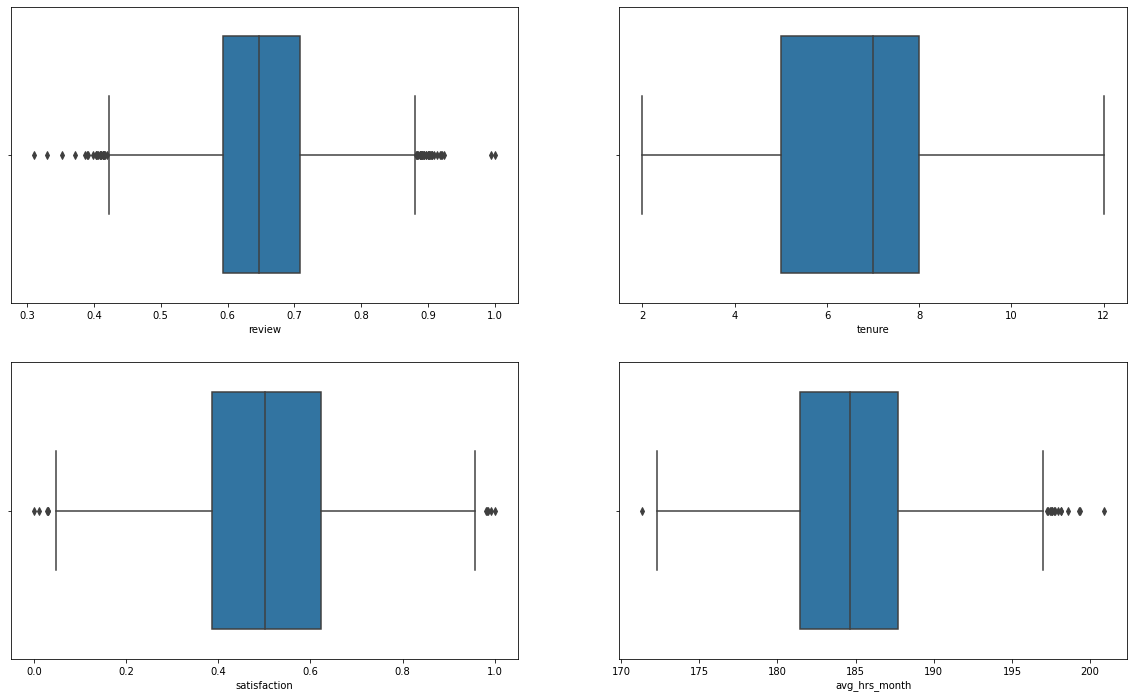

In [21]:
# visualizing numerical col with boxplot for outlier analysis 
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.boxplot(x=df['review'])
plt.subplot(2,2,2)
sns.boxplot(x=df['tenure'])
plt.subplot(2,2,3)
sns.boxplot(x=df['satisfaction'])
plt.subplot(2,2,4)
sns.boxplot(x=df['avg_hrs_month'])
plt.show()

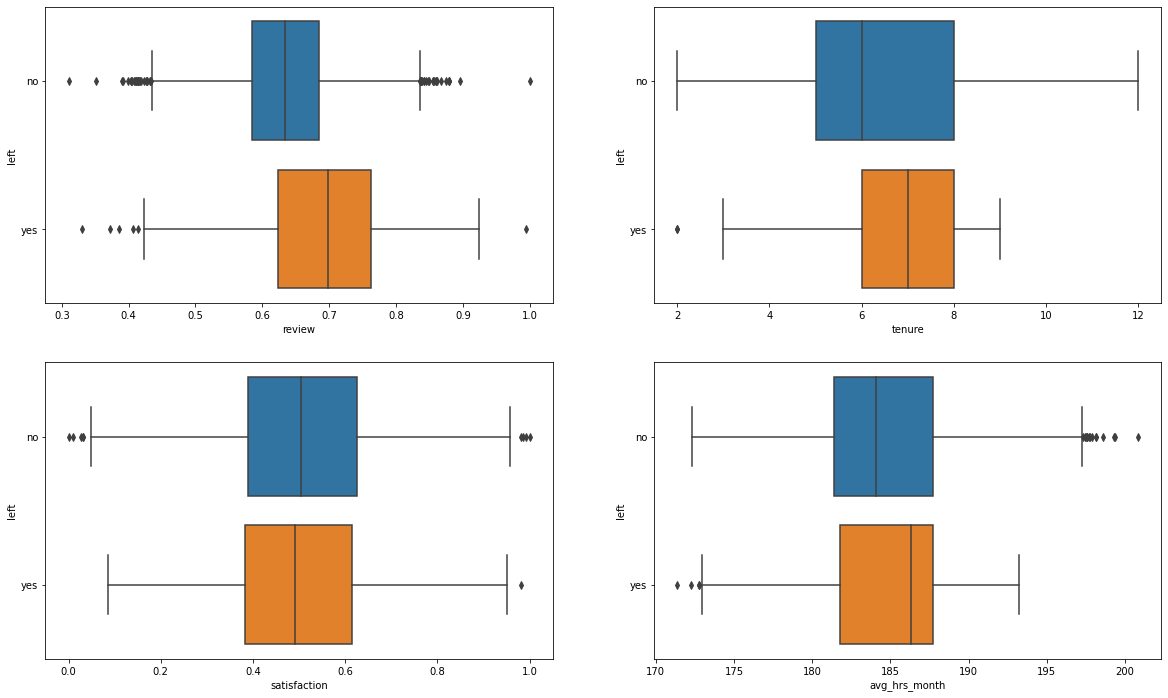

In [22]:
# visualizing numerical col leave and stay employees with boxplot for outlier analysis
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.boxplot(x=df['review'], y=df['left'])
plt.subplot(2,2,2)
sns.boxplot(x=df['tenure'], y=df['left'])
plt.subplot(2,2,3)
sns.boxplot(x=df['satisfaction'], y=df['left'])
plt.subplot(2,2,4)
sns.boxplot(x=df['avg_hrs_month'], y=df['left'])
plt.show()

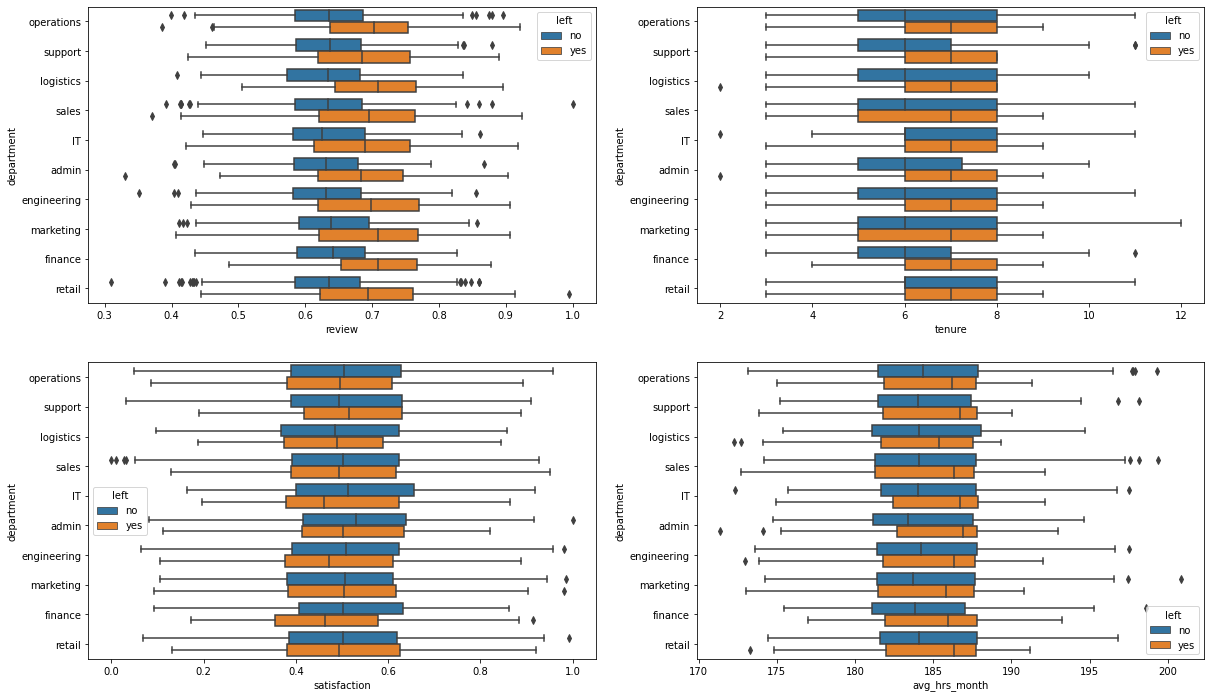

In [23]:
# visualizing numerical col with deparment category leave and stay employees with boxplot for outlier analysis
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.boxplot(x=df['review'], y=df['department'], hue=df['left'])
plt.subplot(2,2,2)
sns.boxplot(x=df['tenure'], y=df['department'], hue=df['left'])
plt.subplot(2,2,3)
sns.boxplot(x=df['satisfaction'], y=df['department'], hue=df['left'])
plt.subplot(2,2,4)
sns.boxplot(x=df['avg_hrs_month'], y=df['department'], hue=df['left'])
plt.show()

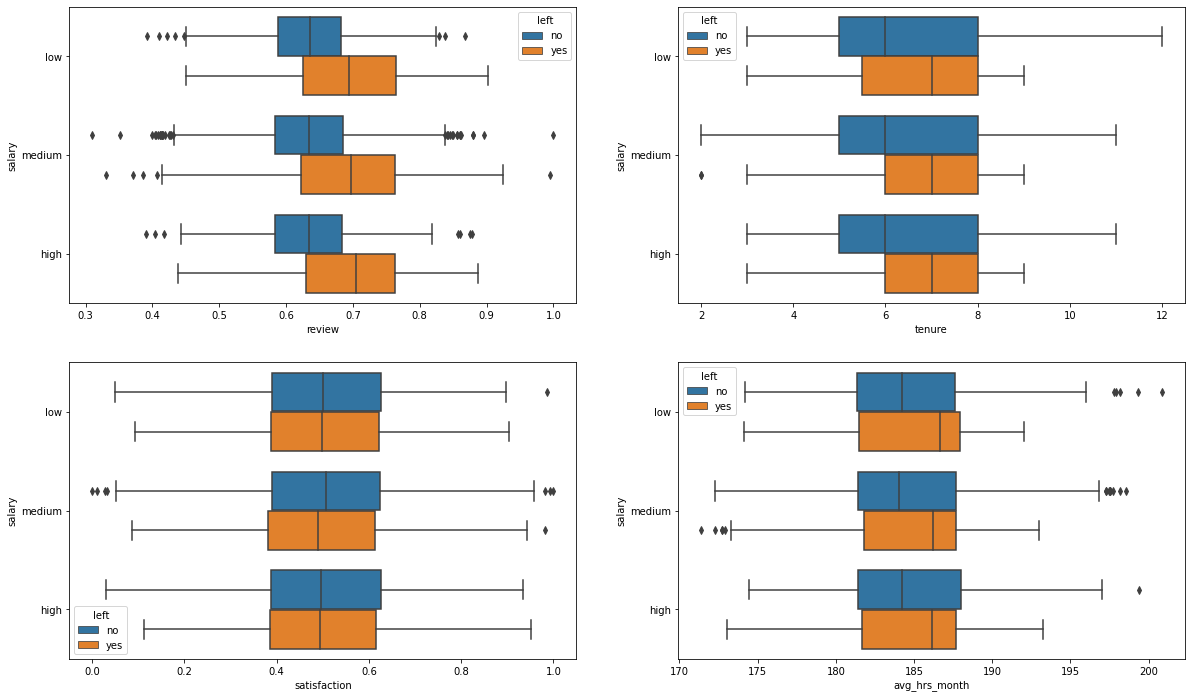

In [24]:
# visualizing numerical col with salary category leave and stay employees with boxplot for outlier analysis
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.boxplot(x=df['review'], y=df['salary'], hue=df['left'])
plt.subplot(2,2,2)
sns.boxplot(x=df['tenure'], y=df['salary'], hue=df['left'])
plt.subplot(2,2,3)
sns.boxplot(x=df['satisfaction'], y=df['salary'], hue=df['left'])
plt.subplot(2,2,4)
sns.boxplot(x=df['avg_hrs_month'], y=df['salary'], hue=df['left'])
plt.show()

/usr/lib/python3/dist-packages/seaborn/_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/lib/python3/dist-packages/seaborn/_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/lib/python3/dist-packages/seaborn/_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/lib/python3/dist-packages/seaborn/_core.py:1006: FutureWarning: When grouping with a length-1 list-li

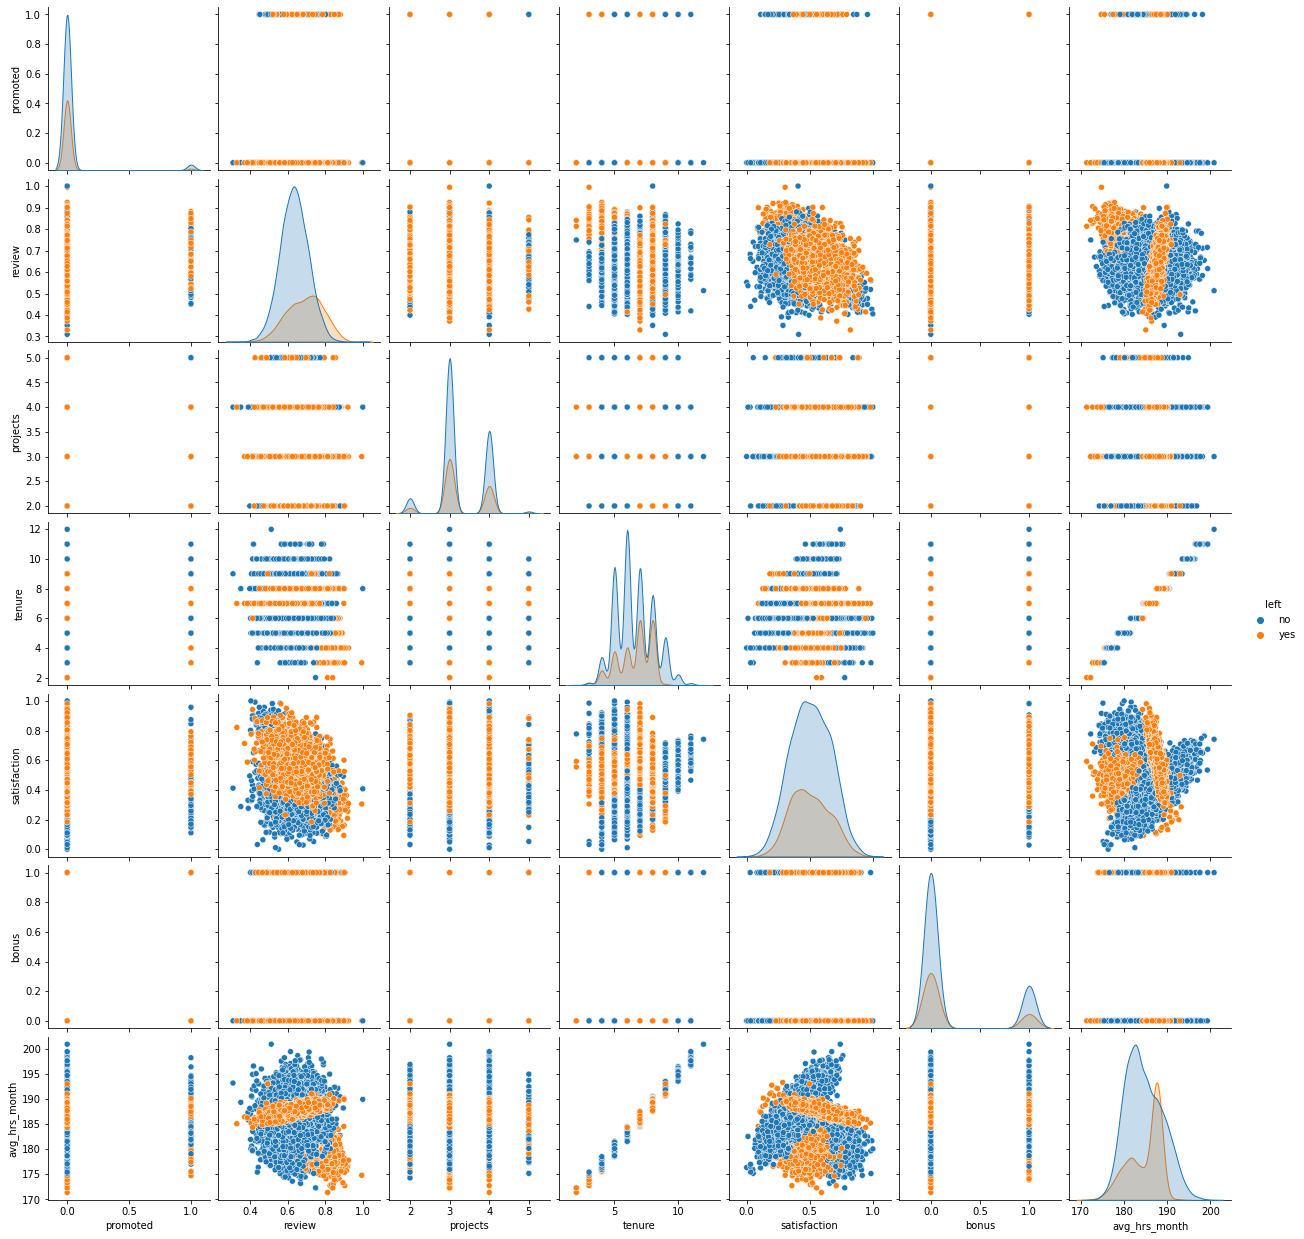

In [25]:
# visualizing numerical cols with others numerical cols 
sns.pairplot(df, hue='left')
plt.show()

### Model Building

In [26]:
# extract independent variable (x) and dependent variable (y)
x = df.drop(columns=['left'])
y = df['left']

In [27]:
# split data into training set (80%) and testing set (20%)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=24)

In [28]:
# apply labelencoder on target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
traf1 = ColumnTransformer([
    ('ordinal_encoding_salary', OrdinalEncoder(categories=[['low', 'medium', 'high']]), [4]),
    ('one_hot_encoding_department', OneHotEncoder(sparse_output=False), [0])  # Updated line
], remainder='passthrough')

In [30]:
# # create column transformer for transforming categorical column into numerical
# traf1 = ColumnTransformer([
#     ('ordinal_encoding_salary', OrdinalEncoder(categories= [['low','medium','high']]),[4]),
#     ('one_hot_encoding_department', OneHotEncoder(sparse=False), [0])
# ], remainder = 'passthrough')

In [31]:
# create column transformer for scale the value
traf2 = ColumnTransformer([
    ('standard_scaling', StandardScaler(),slice(0,18))
], remainder = 'passthrough')

In [32]:
# create feature selection object class to extract top 10 features
traf3 = SelectKBest(k=10)

In [33]:
# create voting classifier model using 5 classifiers 
svc = SVC()
knc = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=200, max_depth=10)
hgbc = HistGradientBoostingClassifier()
cbc = CatBoostClassifier(verbose=0, n_estimators=250)
traf4 = VotingClassifier(estimators=[
    ('SVC',svc),
    ('KNC',knc),
    ('RFC',rfc),
    ('HGBC',hgbc),
    ('CBC',cbc)
], voting='hard')
# traf4 = BaggingClassifier(base_estimator=cbc, n_jobs=4)

In [34]:
# create a pipeline for predict employee turnover
pipe = Pipeline([
    ('Pre-processing',traf1),
    ('Standard_Scalling',traf2),
    ('Feature Selection',traf3),
    ('Model',traf4)
])

In [35]:
# fiting training data into pipeline or model
pipe.fit(x_train.values,y_train)

Pipeline(steps=[('Pre-processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal_encoding_salary',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  [4]),
                                                 ('one_hot_encoding_department',
                                                  OneHotEncoder(sparse_output=False),
                                                  [0])])),
                ('Standard_Scalling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard_scaling',
                                                  StandardScaler(),
                                                  slice(0, 18, None))])),
                ('Feature Selection', SelectKBest()),
                ('Model',
                 VotingClassifier(estimators=[('SVC', SVC()),
                                              ('KNC',
                                               KNeighborsClassifier(n_neighbors=3)),
                                              ('RFC',
                                               RandomForestClassifier(max_depth=10,
                                                                      n_estimators=200)),
                                              ('HGBC',
                                               HistGradientBoostingClassifier()),
                                              ('CBC',
                                               <catboost.core.CatBoostClassifier object at 0x7fa9202cd160>)]))])

In [36]:
# evaluate the model
pipe_pred = pipe.predict(x_test.values)
print("Confusion Matrix :", confusion_matrix(y_test,pipe_pred))
print("Accuracy Score :", accuracy_score(y_test,pipe_pred))
print("ROC AUC Score :", roc_auc_score(y_test,pipe_pred))

Confusion Matrix : [[1259   93]
 [ 141  415]]
Accuracy Score : 0.8773584905660378
ROC AUC Score : 0.8388079477246605


In [37]:
# check model performace using cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipe, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=4, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.836 (0.048)


In [38]:
# dump model pipeline
import pickle
pipeline = pickle.dump(pipe,open("pipeline.pkl","wb"))

In [39]:
pipeline = pickle.load(open("pipeline.pkl","rb"))
test = pipeline.predict([['sales',1,0.6,1,'low',7,0.7,0,185]])
print(test[0])

0


### Model Selection Process

In [40]:
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [41]:
p_pipe = Pipeline([
    ('Pre-processing',traf1),
    ('Min_Max_Scalling',traf2),
])

In [42]:
x_train_traf = p_pipe.fit_transform(x_train)
x_test_traf = p_pipe.transform(x_test)

In [43]:
lr = LogisticRegression()
lr.fit(x_train_traf,y_train)
y_pred = lr.predict(x_test_traf)
print("Confusion Matrix :", confusion_matrix(y_test,y_pred))
print("Accuracy Score :", accuracy_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Confusion Matrix : [[1266   86]
 [ 428  128]]
Accuracy Score : 0.7306079664570231
ROC AUC Score : 0.583303179941254


In [44]:
svc = SVC()
svc.fit(x_train_traf,y_train)
y_pred1 = svc.predict(x_test_traf)
print("Confusion Matrix :", confusion_matrix(y_test,y_pred1))
print("Accuracy Score :", accuracy_score(y_test,y_pred1))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred1))

Confusion Matrix : [[1281   71]
 [ 267  289]]
Accuracy Score : 0.8228511530398323
ROC AUC Score : 0.733634689881231


In [45]:
knc = KNeighborsClassifier(n_neighbors=3, n_jobs=4)
knc.fit(x_train_traf,y_train)
y_pred2 = knc.predict(x_test_traf)
print("Confusion Matrix :", confusion_matrix(y_test,y_pred2))
print("Accuracy Score :", accuracy_score(y_test,y_pred2))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred2))

Confusion Matrix : [[1177  175]
 [ 204  352]]
Accuracy Score : 0.8013626834381551
ROC AUC Score : 0.7518278276786855


In [46]:
rfc = RandomForestClassifier()
rfc.fit(x_train_traf,y_train)
y_pred4 = rfc.predict(x_test_traf)
print("Confusion Matrix :", confusion_matrix(y_test,y_pred4))
print("Accuracy Score :", accuracy_score(y_test,y_pred4))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred4))

Confusion Matrix : [[1249  103]
 [ 149  407]]
Accuracy Score : 0.8679245283018868
ROC AUC Score : 0.8279154782682729


In [47]:
hgbc = HistGradientBoostingClassifier()
hgbc.fit(x_train_traf,y_train)
y_pred6 = hgbc.predict(x_test_traf)
print("Confusion Matrix :", confusion_matrix(y_test,y_pred6))
print("Accuracy Score :", accuracy_score(y_test,y_pred6))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred6))

Confusion Matrix : [[1247  105]
 [ 137  419]]
Accuracy Score : 0.8731656184486373
ROC AUC Score : 0.8379672002043336


In [48]:
cbc = CatBoostClassifier(verbose=0, n_estimators=250)
cbc.fit(x_train_traf,y_train)
y_pred9 = cbc.predict(x_test_traf)
print("Confusion Matrix :", confusion_matrix(y_test,y_pred9))
print("Accuracy Score :", accuracy_score(y_test,y_pred9))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred9))

Confusion Matrix : [[1247  105]
 [ 131  425]]
Accuracy Score : 0.8763102725366876
ROC AUC Score : 0.843362883657571


In [49]:
svc1 = SVC()
knc1 = KNeighborsClassifier()
rfc1 = RandomForestClassifier()
hgbc1 = HistGradientBoostingClassifier()
cbc1 = CatBoostClassifier(verbose=0, n_estimators=250)

vc = VotingClassifier(estimators=[
    ('SVC',svc1),
    ('KNC',knc1),
    ('RFC',rfc1),
    ('HGBC',hgbc1),
    ('CBC',cbc1)
], voting='hard')

In [50]:
vc.fit(x_train_traf,y_train)

VotingClassifier(estimators=[('SVC', SVC()), ('KNC', KNeighborsClassifier()),
                             ('RFC', RandomForestClassifier()),
                             ('HGBC', HistGradientBoostingClassifier()),
                             ('CBC',
                              <catboost.core.CatBoostClassifier object at 0x7fa920b6f3a0>)])

In [51]:
y_pred10 = vc.predict(x_test_traf)
print("Confusion Matrix :", confusion_matrix(y_test,y_pred10))
print("Accuracy Score :", accuracy_score(y_test,y_pred10))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred10))

Confusion Matrix : [[1260   92]
 [ 150  406]]
Accuracy Score : 0.8731656184486373
ROC AUC Score : 0.8310842450300114


In [52]:
testing = x_test.sample(20)

In [53]:
testing_traf = p_pipe.transform(testing)

In [54]:
classifiers = [svc,knc,rfc,hgbc,cbc]
for i in range(len(testing)):
    data = [testing_traf[i]]
    votes = []
    for classifier in classifiers:
        votes.append(classifier.predict(data)[0])
    win = ''
    zeros,ones = votes.count(0)*10*2,votes.count(1)*10*2
    if ones > zeros:
        win = str(ones) + '% changes of leave'
    else:
        win = str(zeros) + '% changes of stay'
    
    print(i,' ',votes,' ',vc.predict([testing_traf[i]]),' ',win)

0   [0, 1, 0, 0, 0]   [0]   80% changes of stay
1   [0, 0, 1, 1, 1]   [1]   60% changes of leave
2   [0, 0, 0, 0, 0]   [0]   100% changes of stay
3   [0, 1, 1, 1, 1]   [1]   80% changes of leave
4   [0, 0, 0, 0, 0]   [0]   100% changes of stay
5   [0, 0, 0, 0, 0]   [0]   100% changes of stay
6   [0, 0, 0, 0, 0]   [0]   100% changes of stay
7   [0, 0, 0, 0, 0]   [0]   100% changes of stay
8   [0, 0, 0, 0, 0]   [0]   100% changes of stay
9   [0, 0, 0, 0, 0]   [0]   100% changes of stay
10   [0, 0, 0, 0, 0]   [0]   100% changes of stay
11   [0, 0, 0, 0, 0]   [0]   100% changes of stay
12   [0, 0, 0, 0, 0]   [0]   100% changes of stay
13   [0, 0, 0, 0, 0]   [0]   100% changes of stay
14   [0, 0, 0, 0, 0]   [0]   100% changes of stay
15   [0, 0, 0, 0, 0]   [0]   100% changes of stay
16   [0, 0, 1, 1, 1]   [1]   60% changes of leave
17   [0, 0, 0, 0, 0]   [0]   100% changes of stay
18   [0, 1, 1, 1, 1]   [1]   80% changes of leave
19   [0, 0, 0, 0, 0]   [0]   100% changes of stay
